In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

random_state = 42
test_size = 0.2

df = pd.read_csv('../data/processed/cleaned_heart_attack.csv', sep=',')
columns = df.columns.to_numpy()
target  = "Heart Attack Risk"
df.iloc[:5, 10:20]

,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Binary_sex
0,0,9,6.615001,261404,31.251233,286,0,6,0,1
1,0,1,4.963459,285768,27.194973,235,1,7,0,1
2,1,9,9.463426,235282,28.176571,587,4,4,0,0
3,0,9,7.648981,125640,36.464704,378,3,4,0,1
4,0,6,1.514821,160555,21.809144,231,1,5,0,1


In [3]:
x = df.drop(target, axis = 1)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

In [4]:
#normalisation

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

scaler = minmax
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
##Model-Based Feature Selection

rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [6]:
feature_importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.0098]
top_features


,Feature,Importance
14,BMI,0.072126
13,Income,0.070873
8,Exercise Hours Per Week,0.070235
15,Triglycerides,0.069595
12,Sedentary Hours Per Day,0.069020
1,Cholesterol,0.068401
2,Heart Rate,0.062472
19,Systolic,0.061782
0,Age,0.061085
20,Diastolic,0.058197


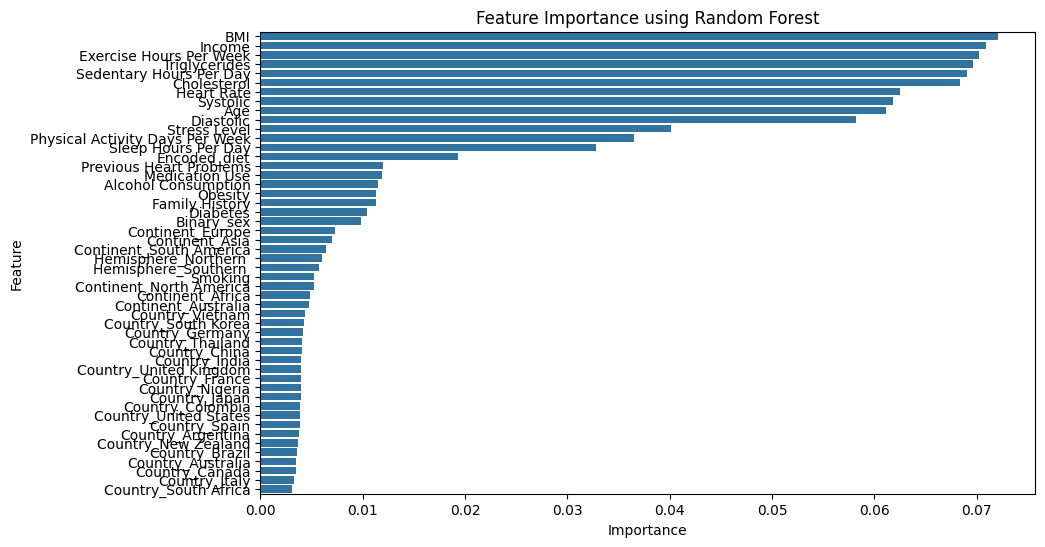

In [7]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()

In [8]:
dff = df.loc[:, top_features.Feature]
dff

,BMI,Income,Exercise Hours Per Week,Triglycerides,Sedentary Hours Per Day,Cholesterol,Heart Rate,Systolic,Age,Diastolic,...,Physical Activity Days Per Week,Sleep Hours Per Day,Encoded_diet,Previous Heart Problems,Medication Use,Alcohol Consumption,Obesity,Family History,Diabetes,Binary_sex
0,31.251233,261404,4.168189,286,6.615001,208,72,158,67,88,...,0,6,1.0,0,0,0,0,0,0,1
1,27.194973,285768,1.813242,235,4.963459,389,98,165,21,93,...,1,7,0.0,1,0,1,1,1,1,1
2,28.176571,235282,2.078353,587,9.463426,324,72,174,21,99,...,4,4,2.0,1,1,0,0,0,1,0
3,36.464704,125640,9.828130,378,7.648981,383,73,163,84,100,...,3,4,1.0,1,0,1,0,1,1,1
4,21.809144,160555,5.804299,231,1.514821,318,93,91,66,88,...,1,5,0.0,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,19.655895,235420,7.917342,67,10.806373,121,61,94,60,76,...,7,7,2.0,1,1,1,0,1,1,1
8759,23.993866,217881,16.558426,617,3.833038,120,73,157,28,102,...,4,9,2.0,0,0,0,1,0,1,0
8760,35.406146,36998,3.148438,527,2.375214,250,105,161,47,75,...,4,4,1.0,1,0,1,1,1,0,1
8761,27.294020,209943,3.789950,114,0.029104,178,60,119,36,67,...,2,8,0.0,1,1,0,0,0,1,1


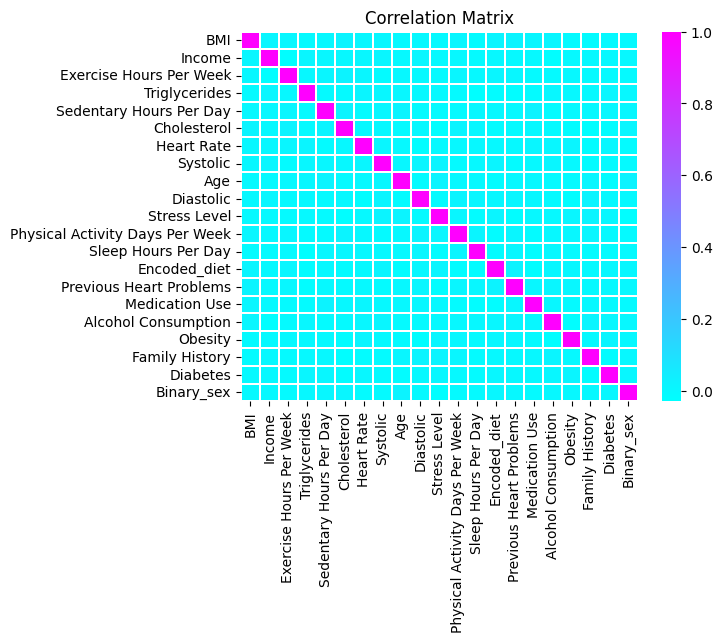

In [9]:
# Compute correlation matrix for all variables
corr_matrix = dff.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='cool', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

In [10]:
dff[target] = y
dff.to_csv('../data/processed/randomForest_selected_features.csv', sep = ',', header = True, index = False)

In [11]:
##Iterative Feature Selection

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=random_state),
n_features_to_select=15)
select.fit(x_train, y_train)
# visualize the selected features:
mask = select.get_support()
features_rfe = select.get_feature_names_out()
print(features_rfe)


['Age' 'Cholesterol' 'Heart Rate' 'Family History'
 'Exercise Hours Per Week' 'Stress Level' 'Sedentary Hours Per Day'
 'Income' 'BMI' 'Triglycerides' 'Physical Activity Days Per Week'
 'Sleep Hours Per Day' 'Systolic' 'Diastolic' 'Encoded_diet']


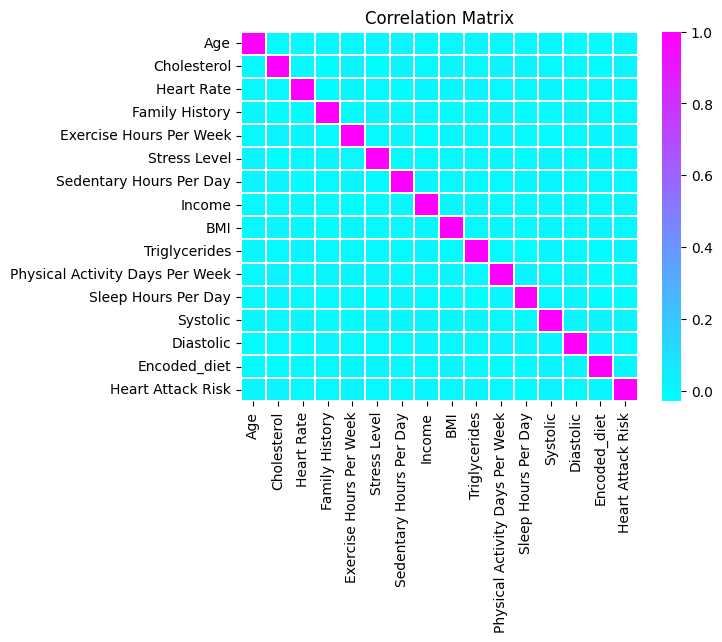

(Heart Attack Risk
 0    5624
 1    3139
 Name: count, dtype: int64,
 Heart Attack Risk
 0    5624
 1    3139
 Name: count, dtype: int64)

In [18]:
df_rfe= df.loc[:, features_rfe]
df_rfe.loc[:, target] = y
corr_matrix_rfe = df_rfe.corr()
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix_rfe, annot=False, cmap='cool', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()
df_rfe[target].value_counts(), y.value_counts()

In [19]:
df_rfe.to_csv('../data/processed/RFE_selected_features.csv', sep = ',', header = True, index = False)